# Speech Emotion Recognition – Preprocessing
## Notebook 6: Data Balancing (Class Distribution)

**Registration Number:** IT24102758  
**Task:** Check and balance class distribution, then apply balancing if needed.  
**Objective:** Prevent bias toward majority classes and prepare balanced labels for ML models.

### Step 1: Importing Libraries and Data Arrays
First, we need to import the necessary Libraries and Data Arrays of Extracted Features.

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.utils import resample
from sklearn.preprocessing import OneHotEncoder

X = np.load("../results/features_and_labels/X_features.npy", allow_pickle=False)
y = np.load("../results/features_and_labels/y_labels.npy", allow_pickle=True)

print("Features shape:", X.shape)
print("Labels shape:", y.shape)

Features shape: (2870, 116)
Labels shape: (2870,)


### Step 2: Check Class Distribution

Class distribution: Counter({'sad': 384, 'angry': 384, 'disgust': 384, 'happy': 382, 'fearful': 382, 'surprised': 382, 'calm': 380, 'neutral': 192})


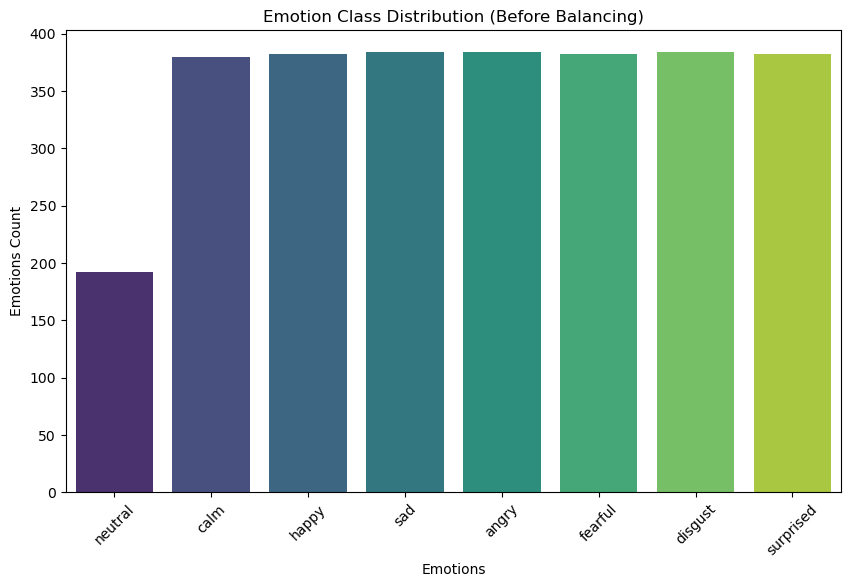

In [19]:
counts = Counter(y)
print("Class distribution:", counts)

plt.figure(figsize=(10,6))
sns.countplot(x=y, hue=y, order=counts.keys(), palette="viridis")
plt.title("Emotion Class Distribution (Before Balancing)")
plt.xticks(rotation=45)
plt.xlabel("Emotions")
plt.ylabel("Emotions Count")
plt.show()

### Step 3: Apply Oversampling to Balance Classes

In [20]:
df = pd.DataFrame(list(zip(list(X), y)), columns=["Features", "Emotion"])

max_size = df["Emotion"].value_counts().max()

dfs = []
for label, group in df.groupby("Emotion"):
    dfs.append(resample(group, replace=True, n_samples=max_size, random_state=42))
df_balanced = pd.concat(dfs)

df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print("New class distribution:\n", df_balanced["Emotion"].value_counts())

New class distribution:
 Emotion
surprised    384
happy        384
sad          384
angry        384
neutral      384
calm         384
fearful      384
disgust      384
Name: count, dtype: int64


### Step 4: Visualize Balanced Distribution

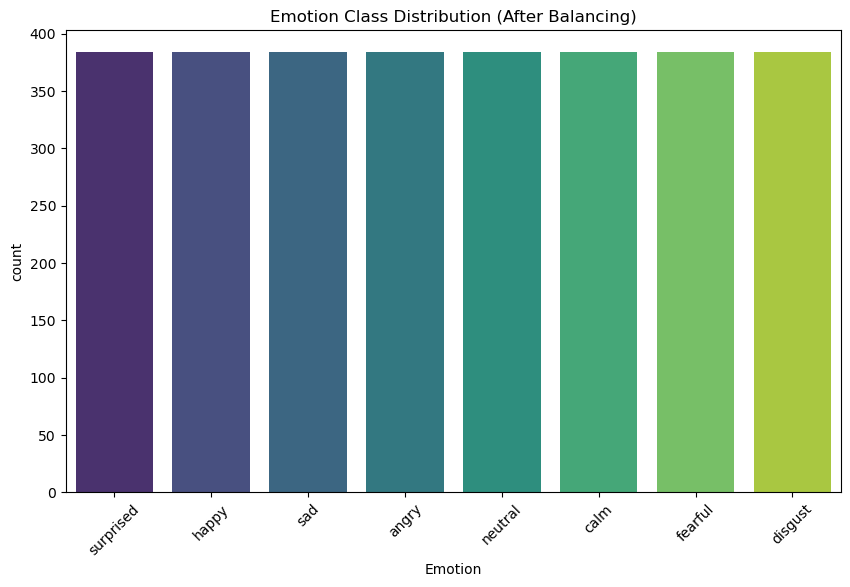

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(x=df_balanced["Emotion"], hue=df_balanced["Emotion"], order=pd.Series(df_balanced["Emotion"]).value_counts().index, palette="viridis")
plt.title("Emotion Class Distribution (After Balancing)")
plt.xticks(rotation=45)
plt.show()

# ✅ Conclusion
- Checked Original Dataset and detected that Some Classes had Fewer Samples.  
- Used **Oversampling** to balance the all Emotion Categories.  
- After balancing, each Class has Equal Representation.  
- This ensures our ML Model will not be biased toward Majority Emotions.